# Quality Assessment
Now it's your turn. Follow [the steps on the platform](https://platform.wbscodingschool.com/courses/data-science/9474/) and use what you've learnt to see how reliable the data is.

In [8]:
import pandas as pd

Load our cleaned DataFrames

In [9]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

## 1.&nbsp; Define Pandas display format

In [10]:
# your code here
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)
products_cl

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364
...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392


In [11]:
orderlines_cl

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
216245,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
216246,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
216247,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
216248,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


In [12]:
orders_cl

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
226899,527397,2018-03-14 13:56:38,42.99,Place Order
226900,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226901,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226902,527400,2018-03-14 13:57:41,19.98,Shopping Basket


## 2.&nbsp; Exclude unwanted orders

In [14]:
# your code here
# orders_cl['completed_orders']
#calculate percentage of each category in state column

orders_cl['state'].value_counts(normalize=True) * 100
orders_cl = orders_cl[orders_cl['state'] == 'Completed']
orders_cl.info()







<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 1 to 226614
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      46605 non-null  int64  
 1   created_date  46605 non-null  object 
 2   total_paid    46605 non-null  float64
 3   state         46605 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ MB


In [15]:
ol_df = orderlines_cl.copy()
ol_df
orders_df = orders_cl.copy()
orders_df
products_df = products_cl.copy()

In [16]:
#merge orders_df and ol_df 
merged_orders = orders_df.merge(ol_df, left_on='order_id', right_on='id_order')
merged_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56714 entries, 0 to 56713
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56714 non-null  int64  
 1   created_date      56714 non-null  object 
 2   total_paid        56714 non-null  float64
 3   state             56714 non-null  object 
 4   id                56714 non-null  int64  
 5   id_order          56714 non-null  int64  
 6   product_id        56714 non-null  int64  
 7   product_quantity  56714 non-null  int64  
 8   sku               56714 non-null  object 
 9   unit_price        56714 non-null  float64
 10  date              56714 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 5.2+ MB


## 3.&nbsp; Exclude orders with unknown products


In [17]:
# your code here
products_merge = products_df.merge(merged_orders, how='left', on='sku')
products_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60144 entries, 0 to 60143
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sku               60144 non-null  object 
 1   name              60144 non-null  object 
 2   desc              60144 non-null  object 
 3   price             60144 non-null  float64
 4   in_stock          60144 non-null  int64  
 5   type              60094 non-null  object 
 6   order_id          55320 non-null  float64
 7   created_date      55320 non-null  object 
 8   total_paid        55320 non-null  float64
 9   state             55320 non-null  object 
 10  id                55320 non-null  float64
 11  id_order          55320 non-null  float64
 12  product_id        55320 non-null  float64
 13  product_quantity  55320 non-null  float64
 14  unit_price        55320 non-null  float64
 15  date              55320 non-null  object 
dtypes: float64(8), int64(1), object(7)
memor

In [18]:
merged_orders.info() #sku 56714 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56714 entries, 0 to 56713
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56714 non-null  int64  
 1   created_date      56714 non-null  object 
 2   total_paid        56714 non-null  float64
 3   state             56714 non-null  object 
 4   id                56714 non-null  int64  
 5   id_order          56714 non-null  int64  
 6   product_id        56714 non-null  int64  
 7   product_quantity  56714 non-null  int64  
 8   sku               56714 non-null  object 
 9   unit_price        56714 non-null  float64
 10  date              56714 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 5.2+ MB


In [21]:
# create a list of unique product values from merged_orders
unique_products_list = merged_orders['sku'].unique()
#filter products that match to a product list in products_df
products_merge = products_df[products_df['sku'].isin(unique_products_list)]
products_merge.info() #5168 rows in sku


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5168 entries, 0 to 9968
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       5168 non-null   object 
 1   name      5168 non-null   object 
 2   desc      5168 non-null   object 
 3   price     5168 non-null   float64
 4   in_stock  5168 non-null   int64  
 5   type      5159 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 282.6+ KB


In [22]:
products_df.info() # sku 9992 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.5+ KB


## 4.&nbsp; Explore the revenue from different tables

#### Step 1:
Create the `unit_price_total` as `orderlines.unit_price` * `orderlines.product_quantity`

In [25]:
# your code here
ol_df



,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
216245,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
216246,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
216247,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
216248,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


,id_order,unit_price_total
0,241319,44.99
1,241355,135.98
2,241423,129.16
3,242832,10.77
4,243330,77.99
...,...,...
170208,527397,42.99
170209,527398,42.99
170210,527399,141.58
170211,527400,19.98


#### Step 2: 
Group by `order_id`, summarising by the sum of `unit_price_total`

In [41]:
# your code here
# your code here
#create unit_price_total in ol_df bby unit_proice * product_quantity
ol_df['unit_price_total'] = ol_df.unit_price * ol_df.product_quantity
#group by id_order, summarizing by the sum of unit_price_total
grouped_price = ol_df.groupby('id_order')['unit_price_total'].sum().reset_index()
grouped_price.head()

,id_order,unit_price_total
0,241319,44.99
1,241355,135.98
2,241423,129.16
3,242832,10.77
4,243330,77.99


In [42]:
# The grouped_price table merged with the orders table to easily compare the numbers:
orders_df = orders_df.merge(grouped_price, how='left', left_on='order_id', right_on='id_order')

In [43]:
orders_df

,order_id,created_date,total_paid,state,id_order,unit_price_total
0,241423,2017-11-06 13:10:02,136.15,Completed,241423.00,129.16
1,242832,2017-12-31 17:40:03,15.76,Completed,242832.00,10.77
2,243330,2017-02-16 10:59:38,84.98,Completed,243330.00,77.99
3,245275,2017-06-28 11:35:37,149.00,Completed,245275.00,149.00
4,245595,2017-01-21 12:52:47,112.97,Completed,245595.00,105.98
...,...,...,...,...,...,...
46600,527042,2018-03-14 11:47:50,18.98,Completed,527042.00,13.99
46601,527070,2018-03-14 11:50:48,24.97,Completed,527070.00,19.98
46602,527074,2018-03-14 11:51:42,24.97,Completed,527074.00,19.98
46603,527096,2018-03-14 11:58:40,34.96,Completed,527096.00,29.97


### What is the average difference between `total_paid` and `unit_price_total`?

<AxesSubplot:>

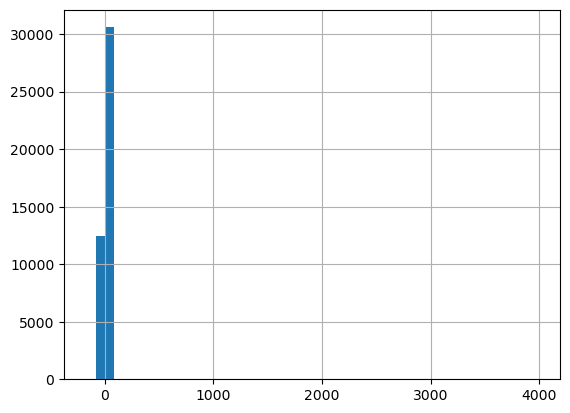

In [51]:
# your code here
#What is the average difference between total_paid and unit_price_total?
orders_df['difference'] = orders_df.total_paid - orders_df.unit_price_total
orders_df['difference'].mean()
orders_df
#What is the distribution of these differences?
orders_df['difference'].hist(bins=50)




### What is the distribution of these differences?

In [49]:
orders_df.difference.mean().round(2) #AttributeError: 'float' object has no attribute 'round'. Why?

AttributeError: 'float' object has no attribute 'round'

In [46]:
# your code here
orders_df['difference'].describe()

count   43064.00
mean        4.45
std        25.64
min      -165.00
25%         0.00
50%         4.99
75%         6.99
max      3984.99
Name: difference, dtype: float64

### Can all the differences be explained by shipping costs? If not, what are other plausible explanations?

In [ ]:
# your explanation here
#calculate the quartiles
Q1 = orders_df.difference.quantile(0.25)
Q3 = orders_df.difference.quantile(0.75)
Q1 #0
Q3 #6.99

#calculate the interquartile range
IQR = Q3 - Q1
IQR #6.99

#filter out the outliers to include only 'non-outliers'
diff_no_ouliers = orders_df[(orders_df.difference >= Q1 - 1.5*IQR) & (orders_df.difference <= Q3 + 1.5*IQR)]
diff_no_ouliers

<AxesSubplot:>

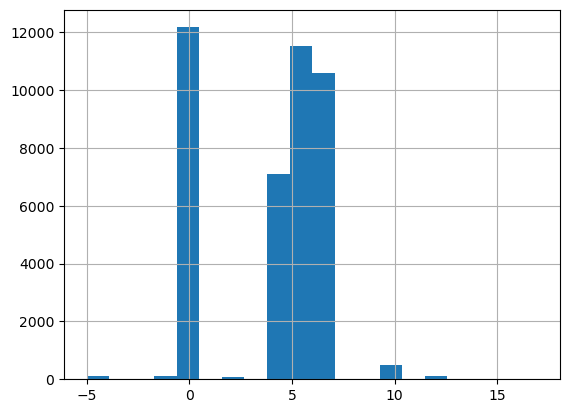

In [60]:
# distribution after outliers removed
diff_no_ouliers.difference.hist(bins=20)

### If there are differences that you can’t explain: what should you do with these orders?

In [61]:
# remove orders with extrtreme differences
normal_diff_list = list(diff_no_ouliers['order_id'])


## 5.&nbsp; Become confident about your dataset

Let's hear your thoughts about what you discovered.

In [ ]:
# your thoughts & code here

Do not forget to download your quality controlled DataFrames

In [ ]:
from google.colab import files

#orders_quality_controlled.to_csv("orders_qu.csv", index=False)
#files.download("orders_qu.csv")

#orderlines_quality_controlled.to_csv("orderlines_qu.csv", index=False)
#files.download("orderlines_qu.csv")

In [ ]:
# import csv files from local files
# DF_name.to_csv("file_name.csv", index=False)

# orders_df.to_csv('orders_df.csv', index=False)
# files.download('orders_df.csv')
# ol_df.to_csv('ol_df.csv', index=False)